In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [ ]:
name = input('请问这个人是魔鬼吗: ')
if name == "syq":
  print('必是 他不是谁是')

In [ ]:
# Read the dataset
data = pd.read_csv('../data/cleaned_and_standardized_creditcard_2023.csv')

Total 0s in 'Class': 240132
Total 1s in 'Class': 204111


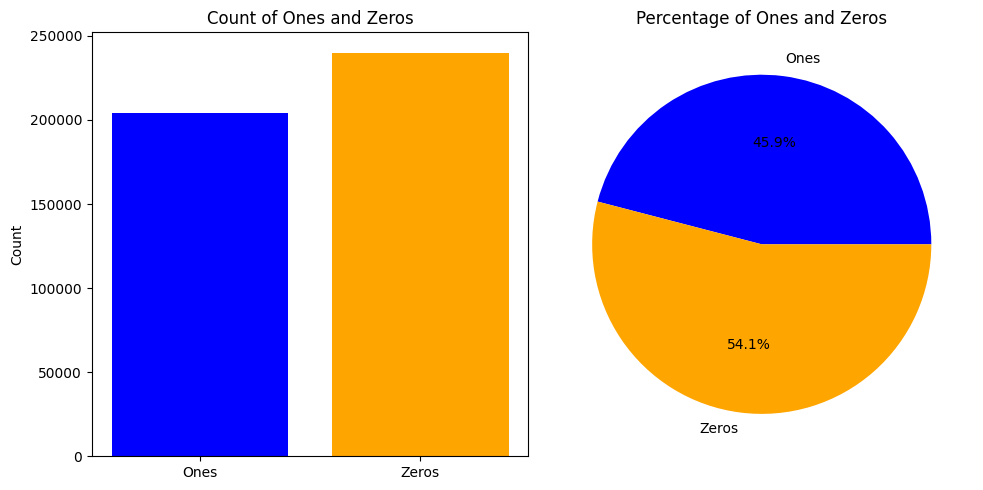

In [ ]:
count_zeros = (data['Class'] == 0).sum()
count_ones = (data['Class'] == 1).sum()
print(f"Total 0s in 'Class': {count_zeros}")
print(f"Total 1s in 'Class': {count_ones}")

# Calculating totals and percentages
total = len(data)
percent_ones = (count_ones / total) * 100
percent_zeros = (count_zeros / total) * 100

# Create a chart
labels = ['Ones', 'Zeros']
counts = [count_ones, count_zeros]
percentages = [percent_ones, percent_zeros]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Bar chart
ax[0].bar(labels, counts, color=['blue', 'orange'])
ax[0].set_title('Count of Ones and Zeros')
ax[0].set_ylabel('Count')

# Pie chart
ax[1].pie(percentages, labels=labels, autopct='%1.1f%%', colors=['blue', 'orange'])
ax[1].set_title('Percentage of Ones and Zeros')

# Display chart
plt.tight_layout()
plt.show()

In [ ]:
# Data preprocessing: Separate features (X) and target variables (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Standarize data
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))

In [ ]:
# Split the data set into training set and test set (70% training set, 30% test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50, stratify=y)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

In [ ]:
# Train the modol
model.fit(X_train, y_train)

# Test it on the test data
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9987
Precision: 0.9995
Recall: 0.9977
F1 Score: 0.9986


In [ ]:
# Output confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 20365
True Negatives (TN): 24003
False Positives (FP): 11
False Negatives (FN): 46


Weight: [ 1.04033043e-04 -1.49873078e+00 -6.75431038e-01 -3.89459069e-01
  3.51523062e+00 -1.33521110e+00 -2.41176135e-01 -2.28910910e+00
 -1.13551189e+00  6.09537003e-01 -1.99414339e+00  2.65528155e+00
 -3.87187001e+00  7.56017656e-01 -3.29322686e+00 -3.73343290e-01
 -1.07818560e+00 -2.28607421e+00 -1.18661286e+00 -2.92836512e-01
 -5.95853174e-01  3.40348863e-01  3.64933892e-01  5.21323759e-01
  3.81435294e-03  6.51985922e-01 -1.38764141e-01 -7.68736233e-03
  2.43794809e-01  7.38757857e+00 -1.08527509e-03]


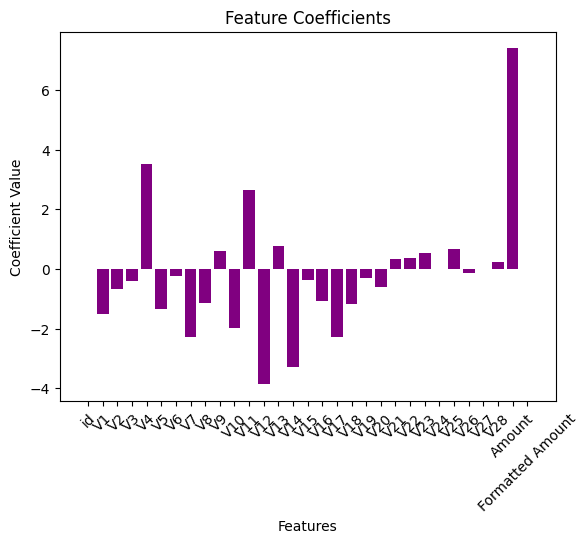

In [ ]:
#Weights
weights = model.coef_[0]
print(f'Weight: {weights}')
coef = model.coef_.flatten()
features = X.columns
plt.bar(features, coef, color='purple')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# SMOTE
sm = SMOTE(random_state=50)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9984
Precision: 0.9990
Recall: 0.9975
F1 Score: 0.9982
Confusion Matrix:
[[23994    20]
 [   52 20359]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
